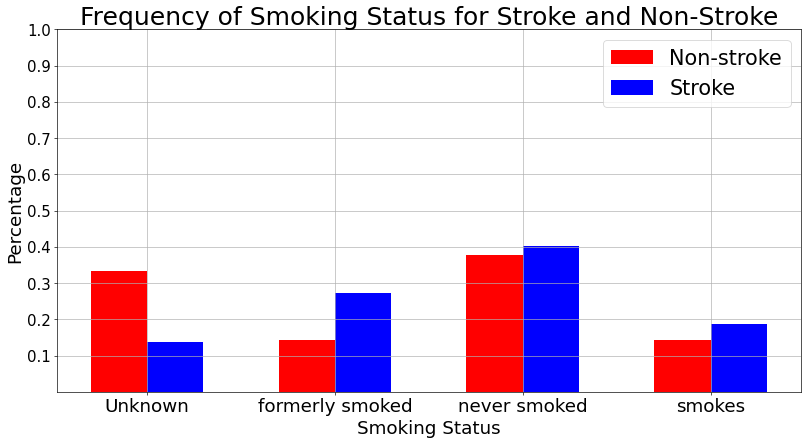

This table shows that there are more occurences of a stroke in people who have a history of smoking and who currently smoke. We can see this from the difference in height of the bars under the 'smokes' and 'formerly smoked' column - the blue bar (has had a stroke) is greater than the red bar.


In [23]:
import os
import matplotlib.pyplot as plt

import mysklearn.myutils as myutils

import myEDA
import myEDA.utils as eda_utils

import myEDA.plot_utils as plot_utils

import mysklearn.mypytable
from mysklearn.mypytable import MyPyTable 


fname = os.path.join("input_data", "stroke-data-downsized.csv")
table = mysklearn.mypytable.MyPyTable().load_from_file(fname)

fname = os.path.join("input_data", "stroke-data-cleaned-numeric.csv")
numeric_table = mysklearn.mypytable.MyPyTable().load_from_file(fname)
 
################## SMOKING STATUS #######################
non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

smoking_non_stroke_values, smoking_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "smoking_status")
#print(smoking_non_stroke_values)
#print(smoking_non_stroke_count)
smoking_stroke_values, smoking_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "smoking_status")
#print(smoking_stroke_values)
#print(smoking_stroke_count)

for i in range(len(smoking_non_stroke_count)):
    value = smoking_non_stroke_count[i]
    smoking_non_stroke_count[i] = value / len(non_stroke)
#print(smoking_non_stroke_count)
for i in range(len(smoking_stroke_count)):
    value = smoking_stroke_count[i]
    smoking_stroke_count[i] = value / len(stroke)
#print(smoking_stroke_count)

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2,3,4], smoking_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3,3.3,4.3], smoking_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15, 3.15, 4.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(smoking_stroke_values, fontsize=22)
ax.set_yticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], fontsize=18)
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1, prop={'size':25})
ax.set_title("Frequency of Smoking Status for Stroke and Non-Stroke", fontsize=30)
ax.set_xlabel("Smoking Status", fontsize=22)
ax.set_ylabel("Percentage", fontsize=22)
plt.grid(True)
plt.show()

print("This table shows that there are more occurences of a stroke in people who have a history of smoking and who currently smoke.", end=" ")
print("We can see this from the difference in height of the bars under the 'smokes' and 'formerly smoked' column - the blue bar", end=" ")
print("(has had a stroke) is greater than the red bar.")

